# Using Landlab to explore a diffusive hillslope in the piedmont of North Carolina 

This notebook was developed in collaboration with Karl Wegmann at North Carolina State University. This notebook was coded by Nicole Gasparini at Tulane University.

<hr>
For tutorials on learning Landlab, click here: <a href="https://github.com/landlab/landlab/wiki/Tutorials">https://github.com/landlab/landlab/wiki/Tutorials</a>
<hr>


**What is this notebook?**

This notebook is designed to be an exercise for students in a quantative geomorphology class. This notebook is meant to illustrate to students how a model can be used to understand and interpret real landscapes. This notebook is not designed to teach students how to code, nor is it designed to teach students how to use Landlab.

This notebook provides data from a real landscape in North Carolina (below) in order to compare the shape of this hillslope with those produced by models using linear diffusion. A group of students at NC State have collected elevation data along the yellow transect in the image of the landscape below. This notebook uses that transect data and compares it  with model output.
 
![alt text](nc_image_with_transect.png)

This notebook steps students through exercises to quantify the diffusivity on this hillslope, assuming that sediment transport on this hillslope follows a linear diffusion law. Students should be introduced to the linear diffusion transport law _before_ using this notebook.

**Application of linear diffusion transport law:**

The tranport law applied here is of the form:

\begin{equation}
q_s = -D \nabla z
\end{equation}

where ${q}_s$ is the transport rate with dimensions of L$^2$T$^{-1}$;  $D$ is a transport coefficient with dimensions of L$^2$T$^{-1}$; and $z$ is elevation. $\nabla z$ is the gradient in the landscape, or change in elevation with change in distance. Landscape slope is $-\nabla z$ (assuming distance increases downhill), hence the negative in the above equation. 
 
Changes in elevation, or erosion, are calculated from conservation of mass:
\begin{equation}
\frac{dz}{dt} = U-\nabla q_s
\end{equation}
where $U$ is the rock uplift rate (relative to a fixed elevation at the boundary), with dimensions LT$^{-1}$, and $t$ is time.

Note that at steady state the rock uplift rate sets the erosion rate. If the erosion rate in a landscape is a known, a modeling scenario in which the landscape is uplifting at the same rate as the known erosion rate will eventually lead to a landscape that is also eroding at that rate. 

Although we call $U$ the rate of rock uplift rate, we would get the same solution if $U$ is the rate of river erosion in the river at the base of a hillslope. For this example, it might easier to think of $U$ as a base-level lowering rate.

**What will we do with Landlab?**

Here we will use the Landlab component *LinearDiffuser*, to explore whether hillslopes evolved according to a linear diffusion rule look like the example North Carolina hillslope. We will just be eye-balling similarities. No rigorous comparison between the real and modeled hillslope is performed.

More general background on applying hillslope process models to real landscapes can be found in this paper:

Roering, Joshua J. (2008) "How well can hillslope evolution models “explain” topography? Simulating soil transport and production with high-resolution topographic data." Geological Society of America Bulletin.

This paper has a nice compilation of measured landscape diffusivity values that can help put the values you get from this exercise in context:

Perron, J. T., (2017) "Climate and the pace of erosional landscape evolution" Annual Review of Earth and Planetary Sciences.

**What do you need to know about this Landscape?**

General information on this landscape can be found in this reference:

Wegmann, K. W., Lewis, R. Q., & Hunt, M. C. (2012). "Historic mill ponds and piedmont stream water quality: Making the connection near Raleigh, North Carolina". The Geological Society of America, Field Guide 29.

For now the following information is provided.

- The site is in the Piedmont near Raleigh, North Carolina.
- The site is in the W.B. Umstead State Park which is in the Sycamore Creek watershed. Sycamore Creek drains into the Neuse River.
- The area gets ~ 1.25 m/yr of rainfall.
- The site is currently forested.
- Basin average erosion rates from the area are on the order of 10 m/million years, or 1e-5 m/yr. These rates are averaged over approximately 100,000 years. These rates are from a nearby area similar to this, but not exactly this study area.
- The site has been heavily impacted from agriculture due to European settlers, beginning in the 1600s. 

**STUDENTS - Step 0 - What you need to do:**

You will start out by making the assumption that the landscape is eroding at a rate of 1e-5 m/yr. 

As you will see, the study area hillslope profile has a form similar to what one would expect from a uniformly eroding diffusive profile. **Your first goal is to find the diffusivity and time required for the profile to reach steady state given the background erosion rate of 1e-5 m/yr.** You can do that by running the code below. **Take special note of Code Block 4 where you set the diffusivity. Make sure choose a resonable initial value, and record what your initial value was.** Code Block 5 will allow you to see the analytical solution for hillslope form using different $D$ Values. You can play with the analystical solution to find the best $D$. Also be prepared to change model run time (Code Block 4) for your initial experiments. Once you iterate to a modeled profile that you feel reasonably matches the DEM profile (just eye-ball the similarity), you will be ready to answer the questions that follow all of the code. 

**How to run a Jupyter notebook:**

Read the text boxes and sequentially run each code block (shift - enter OR got to the _Cell_ pulldown menu at the top and choose _Run Cells_). While a code block is running there is a * in the brackets next to it. Once it has completed running there will be a number in the brackets next to it

Remember that you can always go to the _Kernel_ pulldown menu at the top and choose _Restart & Clear Output_ or _Restart & Run All_ if you change things and want to start afresh. If you just change one code block and rerun only that code block, only the parts of the code in that code block will be updated. (E.g. if you change parameters but don't reset the code blocks that initialize run time or topography, then these values will not be reset.) 

**Now on to the code...**

We start by importing libraries that we will need to run the code. You should not need to edit this code block.

In [1]:
# Code Block 1

import matplotlib.pyplot as plt
import numpy as np

from landlab.plot.imshow import imshow_grid

# below is to make plots show up in the notebook
%matplotlib inline

Now we will use the survey data from the NC State students and compare it to model output. Below is the information from the survey. You should not need to edit this code block.

In [2]:
# Code Block 2

# distance and elevation data along the survey line

field_dist = np.array(
    [
        0,
        1,
        2,
        3,
        4,
        4.99,
        5.99,
        6.99,
        7.99,
        8.99,
        9.99,
        10.99,
        11.99,
        12.99,
        13.99,
        14.98,
        15.98,
        16.98,
        17.98,
        18.98,
        19.98,
        20.98,
        21.98,
        22.98,
        23.98,
        24.97,
        25.97,
        26.97,
        27.97,
        28.97,
        29.97,
        30.97,
        31.97,
        32.97,
        33.97,
        34.96,
        35.96,
        36.96,
        37.96,
        38.96,
        39.96,
        40.96,
        41.96,
        42.96,
        43.95,
        44.95,
        45.95,
        46.95,
        49.95,
        50.95,
        51.95,
        52.95,
        53.94,
        54.94,
        55.94,
        56.94,
        57.94,
        58.94,
        59.94,
        60.94,
        61.94,
        62.94,
        63.93,
        64.93,
        65.93,
        66.93,
        67.93,
        68.93,
        69.93,
        70.93,
        71.93,
        72.92,
        73.92,
        74.92,
        75.92,
        76.92,
        77.92,
        78.92,
        79.92,
        80.92,
        81.92,
        82.91,
        83.91,
        84.91,
        85.91,
        86.91,
        87.91,
        88.91,
    ]
)
field_z = np.array(
    [
        0,
        0.03,
        0.3,
        0.47,
        0.62,
        0.83,
        1.09,
        1.31,
        1.54,
        1.8,
        2.14,
        2.38,
        2.55,
        2.84,
        3.15,
        3.49,
        3.78,
        4.05,
        4.41,
        4.57,
        4.77,
        5.05,
        5.29,
        5.46,
        5.68,
        5.96,
        6.4,
        6.81,
        6.99,
        7.21,
        7.45,
        7.63,
        7.79,
        7.87,
        8.06,
        8.24,
        8.4,
        8.51,
        8.65,
        8.68,
        8.82,
        8.98,
        9.01,
        9.04,
        9.05,
        9.09,
        9.07,
        9.07,
        9.02,
        8.93,
        8.9,
        8.83,
        8.73,
        8.62,
        8.47,
        8.28,
        8.22,
        8,
        7.82,
        7.75,
        7.39,
        7.2,
        7.04,
        6.79,
        6.6,
        6.39,
        6.1,
        5.77,
        5.5,
        5.3,
        5.11,
        4.89,
        4.64,
        4.5,
        4.32,
        4.1,
        3.96,
        3.6,
        3.19,
        2.92,
        2.73,
        2.41,
        2.12,
        1.76,
        1.21,
        0.95,
        0.56,
        0.06,
    ]
)

We will create a grid for our model using Landlab's *RasterModelGrid* class, which we need to import. We make a grid with *dx* = *dy* = 1.0 m (same resolution as the survey data). We make a grid that has 5 columns and 90 rows, to match the length of the profile from the real landscape.

In [3]:
# Code Block 3

from landlab import RasterModelGrid

mg = RasterModelGrid((90, 5), 1.0)  # make grid
z_vals = mg.add_ones("topographic__elevation", at="node")  # initialize z values

# Set initial conditions
initial_elevation = np.multiply(
    z_vals, -1.0
)  # this line and next set elevation to 87. m
z_vals += initial_elevation

# Set boundary conditions
mg.set_closed_boundaries_at_grid_edges(True, False, True, False)

# Initialize values for plotting variables down the middle of the hillslope

ycoord_rast = mg.node_vector_to_raster(mg.node_y)
ys_grid = ycoord_rast[:, 2]

Now we import and initialize the *LinearDiffuser* component. In this case the units on our diffusivity coefficient, or transport coefficient, are m$^2$yr$^{-1}$.

**NOTE to Students:** You need to chose a reasonable initial value for D (diffusivity). Remember you need to justify your initial guess for D. Supplied references should help with this.

We also initialize a few more parameters.

In [4]:
# Code Block 4

from landlab.components import LinearDiffuser

D = 0.005  # value in m^2/yr
lin_diffuse = LinearDiffuser(mg, linear_diffusivity=D)

# Uniform rate of rock uplift, which drives uniform erosion at steady state
uplift_rate = 0.00001  # m/year, start with 1e-5 m/yr

# Total time in years that the model will run for.
runtime = 500000  # years

# Stability criteria for timestep dt.  Coefficient can be changed
# depending on our tolerance for stability vs tolerance for run time.
# Do not change this.
dt = 0.5 * mg.dx * mg.dx / D

print("dt", dt)

# nt is number of time steps
nt = int(runtime // dt)

# Below is to keep track of time for labeling plots
time_counter = 0

# length of uplift over a single time step, meters
uplift_per_step = uplift_rate * dt

dt 100.0


Now we figure out the analytical solution for the elevation of the steady-state profile.

Before we evolve the landscape, we look at the model initial topography, the analytical solution, and the field profile.

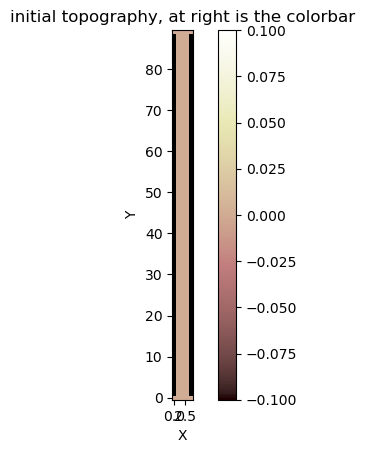

<Figure size 640x480 with 0 Axes>

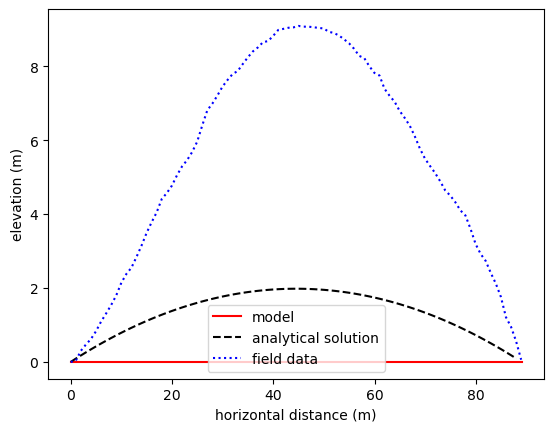

In [5]:
# Code Block 5

# ANALYTICAL SOLUTION
ys = np.arange(mg.number_of_node_rows * mg.dx - mg.dx)

# location of divide or ridge crest -> middle of grid
# based on boundary conds.
divide_loc = (mg.number_of_node_rows * mg.dx - mg.dx) / 2

# half-width of the ridge
half_width = (mg.number_of_node_rows * mg.dx - mg.dx) / 2

# analytical solution for elevation under linear diffusion at steady state
zs = (uplift_rate / (2 * D)) * (np.power(half_width, 2) - np.power(ys - divide_loc, 2))

# PLOTTING
plt.figure()
imshow_grid(mg, "topographic__elevation")
plt.title("initial topography, at right is the colorbar")
plt.figure()
elev_rast = mg.node_vector_to_raster(mg.at_node["topographic__elevation"])
plt.figure()
plt.plot(ys_grid, elev_rast[:, 2], "r-", label="model")
plt.plot(ys, zs, "k--", label="analytical solution")
plt.plot(field_dist, field_z, "b:", label="field data")
plt.xlabel("horizontal distance (m)")
plt.ylabel("elevation (m)")
plt.legend(loc="lower center")
# plt.title('before running model')

Now you can update the values of $D$ in Code Block 4 and rerun Code Block 5 to fit the analytical solution to the field data. 

Once you have done that, run the model and evolve the landscape to make sure it also fits the analytical solution. You may need to update $runtime$ in Code Block 4 if the model does not match the analytical solution. Remember that you need to find the $D$ value and approximate time that it takes for the landscape to reach steady state.

Below is the time loop that does all the calculations. 

In [6]:
# Code Block 6

for i in range(nt):
    mg["node"]["topographic__elevation"][mg.core_nodes] += uplift_per_step
    lin_diffuse.run_one_step(dt)
    time_counter += dt

print("time evolved for ", time_counter, " years")

time evolved for  500000.0  years


Now we plot the evolved cross-section.

Text(0.5, 1.0, 'topographic cross section at time 500000.0, with D = 0.005 m^2/yr')

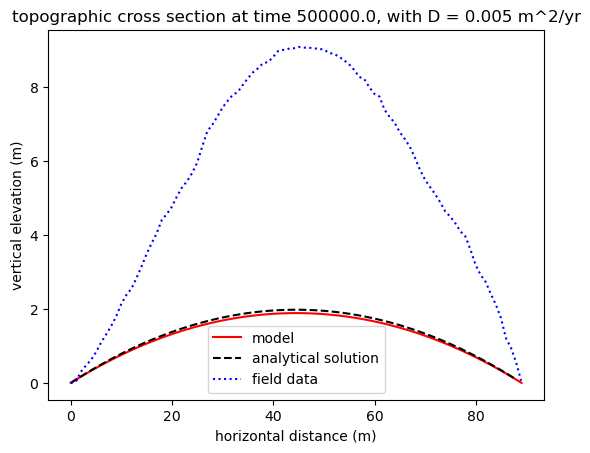

In [7]:
# Code Block 7
plt.figure()
elev_rast = mg.node_vector_to_raster(mg.at_node["topographic__elevation"])
plt.plot(ys_grid, elev_rast[:, 2], "r-", label="model")
plt.plot(ys, zs, "k--", label="analytical solution")
plt.plot(field_dist, field_z, "b:", label="field data")
plt.xlabel("horizontal distance (m)")
plt.ylabel("vertical elevation (m)")
plt.legend(loc="lower center")
plt.title(f"topographic cross section at time {time_counter}, with D = {D} m^2/yr")

**Questions to answer and further model experiments:**

_NOTE_ You should hand in a typed, electronic document that has figures embedded in the document. The document can be any type of readable file. Please include your name in the file name that you turn in.

**Questions:**
1. Your first task was to find the diffusivity and time to steady state required for the model to produce a landscape similar to the field area near Raleigh, NC. (Time to steady state can be approximate, as in within 500,000 years.) What was your initial guess for a diffusivity? What information did you use to choose that initial value? What was the value that produced a good match between the modeled and real hillslope form? (Again, you can eye-ball the match. Just get close visually.) Compared with other values of diffusivity that have been reported in the literature, how does your value compare? Given what you know about this landscape, does this seem like a reasonable diffusivity? Explain.
2. What was the estimated time to steady state using the model? Compare the time to steady state with the time over which erosion rates were measured and the time period over which settlers have dramatically impacted this landscape. What are the implications of the differences among the time to steady state, the time over which erosion rates were measured, and time over which settlers have impacted this system?
3. It is possible that settlers accelerated erosion rates (from the background, pre-settlement rate, which here we can assume is set from "background rock uplift" as 1e-5 m/yr) by almost 500 times. If that happened, the pre-settlement profile likely had a higher peak elevation (and higher total relief), and accelerated erosion would have removed soil and lowered elevations across the profile. This has implications for your estimated diffusivity. 
    - Develop a scenario in which you evolve a 'pre-settlement' hillslope to steady state (should have higher relief than the current profile) with a different diffusivity. Think about whether the diffusivity should be higher or lower to create higher relief, using the same background erosion/rock uplift rate. Change Code Block 4 and create this new pre-settlement steady state landscape using Code Blocks 6 and 7. 
    - Use this landscape as the initial condition to evolve the landscape another 400 years with a new diffusivity to simulate the impact of settlers. (Once you get your pre-settlement hillslope, go back to Code Block 4 and change $D$ and $runtime$ accordingly, then rerun Code Blocks 6 & 7). 
    - You should end up with a simulated hillslope that matches the current topography, but you got there in a different way than you did for the first part of this exercise. Provide plots and describe in detail exactly what you did to simulate the pre- and post-settler landscape. Are there noticeable changes in the landscape? Does this have implications for future evolution of this hillslope?